In [ ]:
#Đọc file dữ liệu 
import pandas as pd

data = pd.read_csv('D:\ThongKeMT&UD\LAB5\mpg.csv')

# Kiểm tra các dòng bị thiếu dữ liệu
print("Số lượng giá trị bị thiếu trong mỗi cột:")
print(data.isnull().sum())

# Xóa các dòng bị thiếu dữ liệu
data = data.dropna()
print("\nDữ liệu sau khi xóa các dòng bị thiếu:")
print(data)

# Kiểm tra dữ liệu trùng lặp
print("\nSố lượng dòng trùng lặp:", data.duplicated().sum())

# Xóa các dòng trùng lặp
data = data.drop_duplicates()
print("\nDữ liệu sau khi xóa các dòng trùng lặp:")
print(data)

In [ ]:
# Tính giá trị trung bình
cylin = data['cylinders']
hore = data['horsepower']
wei = data['weight']

print("Mean values:")
print("Cylinders:", cylin.mean())
print("Horsepower:", hore.mean())
print("Weight:", wei.mean())
print("")

# Tính trung vị
print("Median values:")
print("Cylinders:", cylin.median())
print("Horsepower:", hore.median())
print("Weight:", wei.median())
print("")

# Tính miền giá trị (min, max) và phân vị bậc (Q1, Q3) của 'mpg'
mpg = data['mpg']
print("MPG Statistics:")
print("Min:", mpg.min())
print("Max:", mpg.max())
print("Q1 (25th percentile):", mpg.quantile(0.25))
print("Q3 (75th percentile):", mpg.quantile(0.75))
print("")

# Kiểm tra xe có mức tiêu hao nhiên liệu đặc biệt cao hoặc thấp
iqr = mpg.quantile(0.75) - mpg.quantile(0.25)  # Tính khoảng tứ phân vị (IQR)
lower_bound = mpg.quantile(0.25) - 1.5 * iqr  # Ngưỡng dưới
upper_bound = mpg.quantile(0.75) + 1.5 * iqr  # Ngưỡng trên

print("Outliers in MPG (Fuel Efficiency):")
print("Cars with unusually low MPG:")
print(data[mpg < lower_bound])
print("")
print("Cars with unusually high MPG:")
print(data[mpg > upper_bound])


In [ ]:
# Mức tiêu hao trung bình
mean_mpg_by_origin = data.groupby('origin')['mpg'].mean().sort_values(ascending=False)
print(mean_mpg_by_origin)

# Khu vực tiêu hao ít nhiên liệu nhất (mpg thấp nhất)
lowest_consumption_origin = mean_mpg_by_origin.idxmin()
print(f"Khu vực tiêu hao nhiên liệu nhiều nhất (mpg thấp nhất) là: {lowest_consumption_origin}")            

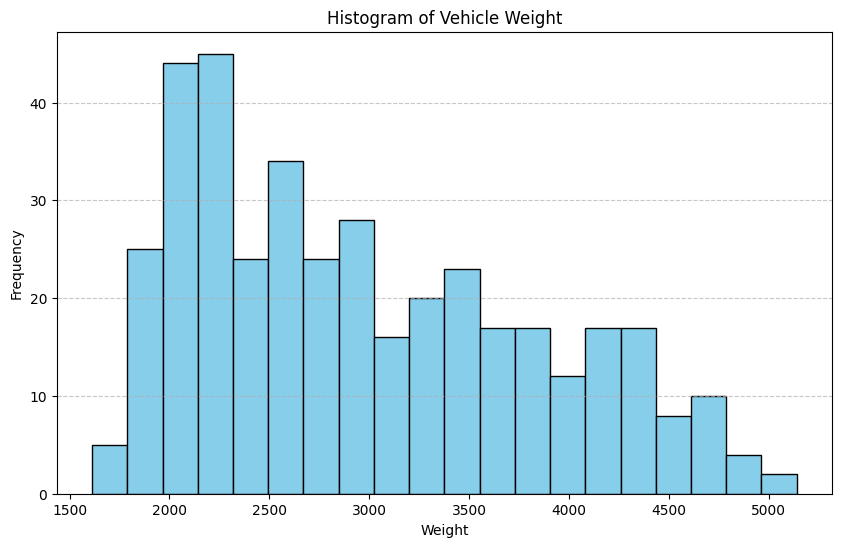

C:\Users\Windows\AppData\Local\Temp\ipykernel_20512\2983953883.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='decade', y='horsepower', data=data, palette='Set2')


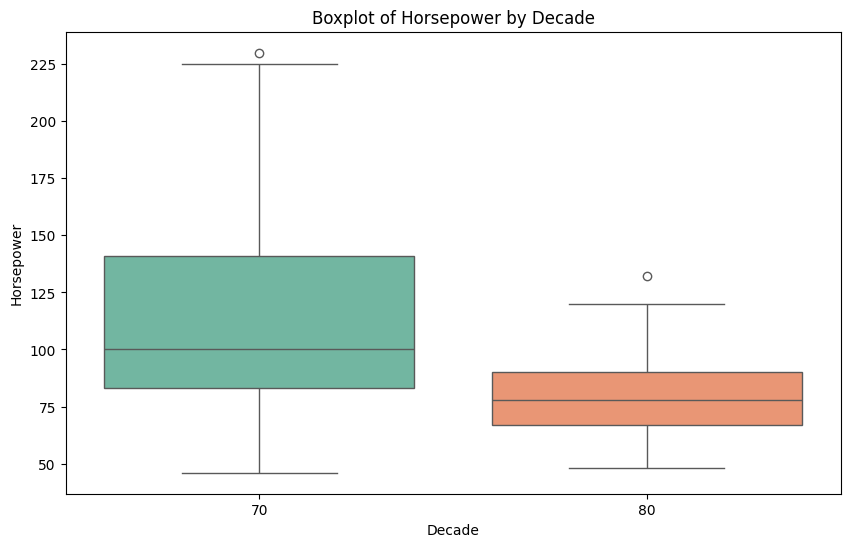

Công suất trung bình theo thập niên:
decade
70    111.228013
80     80.058824
Name: horsepower, dtype: float64

Xe từ thập niên 70 có công suất cao hơn.


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ Histogram thể hiện sự phân bố của trọng lượng (weight)
plt.figure(figsize=(10, 6))
plt.hist(data['weight'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Vehicle Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Thêm cột 'decade' để phân loại xe theo thập niên
data['decade'] = (data['model_year'] // 10) * 10

# Vẽ Boxplot so sánh công suất (horsepower) giữa xe sản xuất trong thập niên 70 và 80
plt.figure(figsize=(10, 6))
sns.boxplot(x='decade', y='horsepower', data=data, palette='Set2')
plt.title('Boxplot of Horsepower by Decade')
plt.xlabel('Decade')
plt.ylabel('Horsepower')
plt.show()

# So sánh công suất trung bình giữa thập niên 70 và 80
mean_horsepower_by_decade = data.groupby('decade')['horsepower'].mean()
print("Công suất trung bình theo thập niên:")
print(mean_horsepower_by_decade)

# Nhận xét
if mean_horsepower_by_decade[70] > mean_horsepower_by_decade[80]:
    print("\nXe từ thập niên 70 có công suất cao hơn.")
else:
    print("\nXe từ thập niên 80 có công suất cao hơn.")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#scatter 
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
# mpg vs cylinders
sns.scatterplot(x='cylinders', y='mpg', data=data, ax=axes[0, 0])
axes[0, 0].set_title('MPG vs Cylinders')

# mpg vs horsepower
sns.scatterplot(x='horsepower', y='mpg', data=data, ax=axes[0, 1])
axes[0, 1].set_title('MPG vs Horsepower')

# mpg vs acceleration
sns.scatterplot(x='acceleration', y='mpg', data=data, ax=axes[1, 0])
axes[1, 0].set_title('MPG vs Acceleration')

# mpg vs model_year
sns.scatterplot(x='model_year', y='mpg', data=data, ax=axes[1, 1])
axes[1, 1].set_title('MPG vs Model Year')

plt.tight_layout()
plt.show()


In [ ]:
print(data.corr()['mpg'][['cylinders','horsepower','acceleration','model_year']].abs().sort_values(ascending=False))


In [ ]:
from scipy.stats import poisson

#Trung bình mỗi lô hàng có 2 lỗi sản xuất. Giả sử số lỗi tuân theo phân phối Poisson. 
#Tính xác suất một lô hàng nhiều hơn 3 lỗi.
p_more_than_3 = 1 - poisson.cdf(3, mu=2)
print(f"Xác suất một lô hàng nhiều hơn 3 lỗi: {p_more_than_3:.4f}")


In [ ]:
from scipy.stats import binom
#Mỗi lô hàng gồm 20 vi mạch, và xác suất mỗi vi mạch đạt tiêu chuẩn là 95%. 
#Tính xác suất một lô hàng có chính xác 18 vi mạch đạt tiêu chuẩn.
p_exact_18 = binom.pmf(18, n=20, p=0.95)
print(f"Xác suất một lô hàng có đúng 18 vi mạch đạt chuẩn: {p_exact_18:.4f}")


In [ ]:
from scipy.stats import norm

#Thời gian hoàn thành một lô hàng tuân theo phân phối chuẩn, với trung bình 50 phút và độ lệch chuẩn 5 phút.

p_under_45 = norm.cdf(45, loc=50, scale=5)
print(f"Xác suất một lô hàng hoàn thành trong 45 phút: {p_under_45:.4f}")

time_top_5 = norm.ppf(0.05, loc=50, scale=5)
print(f"Thời gian hoàn thành để nằm trong top 5% nhanh nhất: {time_top_5:.2f} phút")
